<a href="https://colab.research.google.com/github/DrStephPowers/BIA/blob/main/Supp_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Correlation

In [ ]:
x = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Appendix/statistics3.xlsx', sheet_name="Diamond")

In [ ]:
x.head()

,Diamond,Size (X),Price (Y)
0,1,2.35,20413
1,2,2.03,13080
2,3,1.56,13925
3,4,1.21,7382
4,5,1.21,5154


In [ ]:
import matplotlib.pyplot as plt

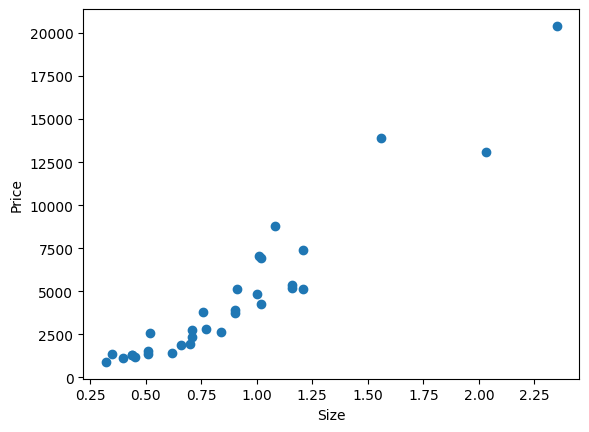

In [ ]:
plt.plot(x["Size (X)"], x["Price (Y)"], linestyle="none", marker='o')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

In [ ]:
x2 = x[["Size (X)", "Price (Y)"]]

In [ ]:
x2.corr(method="pearson")

,Size (X),Price (Y)
Size (X),1.00000,0.94655
Price (Y),0.94655,1.00000


In [ ]:
x3 = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Appendix/statistics3.xlsx', sheet_name="Girls")

In [ ]:
x3.head()

,Girl,Height (X),Weight (Y)
0,1,7.0,140
1,2,7.0,120
2,3,6.5,130
3,4,6.0,130
4,5,6.0,120


## Hypothesis Testing with Correlation

In [ ]:
from scipy.stats import pearsonr

In [ ]:
pearsonr(x2["Size (X)"], x2["Price (Y)"])

PearsonRResult(statistic=0.946549505937821, pvalue=2.7562103766305646e-16)

In [ ]:
pearsonr(x3["Height (X)"], x3["Weight (Y)"])

PearsonRResult(statistic=0.7735869289794366, pvalue=0.003158199602805353)

In [ ]:
x4 = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Appendix/statistics3.xlsx', sheet_name="Repair")

In [ ]:
x4.head()

,Repair Cost,Age
0,170,1
1,130,1
2,180,2
3,205,2
4,220,3


## Regression

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats as stats

In [ ]:
reg = x4.rename(columns={"Repair Cost": "y", "Age": "x"})

In [ ]:
stats.descriptivestats.describe(reg)

,y,x
nobs,10.000000,10.000000
missing,0.000000,0.000000
mean,249.700000,3.000000
std_err,28.188670,0.471405
upper_ci,304.948778,3.923936
lower_ci,194.451222,2.076064
std,89.140401,1.490712
iqr,100.000000,2.000000
iqr_normal,74.130111,1.482602
mad,70.040000,1.200000


In [ ]:
ols_reg = smf.ols("y ~ x", data=reg).fit()

In [ ]:
ols_reg.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     93.82
Date:                Sun, 11 Aug 2024   Prob (F-statistic):           1.08e-05
Time:                        02:50:33   Log-Likelihood:                -45.846
No. Observations:                  10   AIC:                             95.69
Df Residuals:                       8   BIC:                             96.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     77.5000     19.655      3.943      0.004      32.177     122.823
x             57.4000      5.926      9.686      0.000      43.734      71.066
==============================================================================
Omnibus:                        0.890   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.641   Jarque-Bera (JB):                0.690
Skew:                           0.331   Prob(JB):                        0.708
Kurtosis:                       1.896   Cond. No.                         8.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sm.stats.anova_lm(ols_reg, typ=2)

,sum_sq,df,F,PR(>F)
x,65895.2,1.0,93.81936,0.000011
Residual,5618.9,8.0,NaN,NaN


### Test Assumptions

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
res = ols_reg.resid

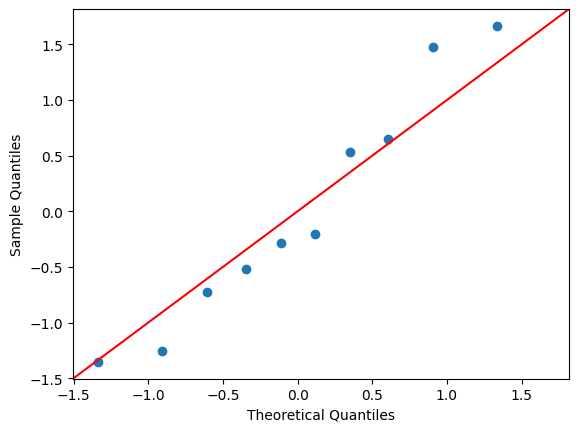

In [ ]:
fig = sm.qqplot(res, stats.t, fit=True, line='45')
plt.show()

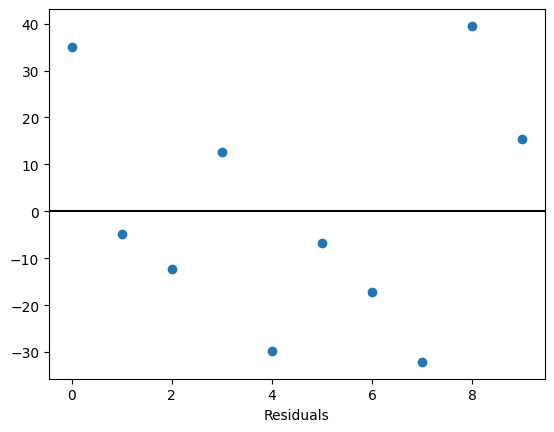

In [ ]:
plt.plot(res, marker = 'o', linestyle="None")
plt.xlabel('Residuals')
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

In [ ]:
x5 = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Appendix/statistics3.xlsx', sheet_name="Tiger")

In [ ]:
x5.head()

,Weight,MPG
0,60,5.3
1,55,5.0
2,80,4.0
3,72,4.2
4,75,4.5
